In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import operator
 

In [5]:
df = pd.read_csv('Datasets/IMDB Dataset.csv')

In [6]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Lets see one Review


In [9]:
df['review'][100].lower() # this is the review at 101st entry 

"this short film that inspired the soon-to-be full length feature - spatula madness - is a hilarious piece that contends against similar cartoons yielding multiple writers. the short film stars edward the spatula who after being fired from his job, joins in the fight against the evil spoons. this premise allows for some funny content near the beginning, but is barely present for the remainder of the feature. this film's 15-minute running time is absorbed by some odd-ball comedy and a small musical number. unfortunately not much else lies below it. the plot that is set up doesn't really have time to show. but it's surely follows it plot better than many high-budget hollywood films. this film is worth watching at least a few times. take it for what it is, and don't expect a deep story."

In [10]:
df['sentiment'][100]

'positive'

#as the data is taken from a website run on html need to see Tags that are used

In [12]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

TO CHECK FOR NULL VALUES

In [14]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [15]:
#no null values

In [16]:
df['review'].str.isspace().sum()

0

In [17]:
#no empty spaces

In [18]:
import re

def remove_html_tags_regex(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)


In [19]:
df['review']=df['review'].apply(remove_html_tags_regex)

In [20]:
#no html tags

In [21]:
def remove_url(text):
    clean =re.compile(r'https?://\S+|www\.\S+')
    return clean.sub(r'',text)



In [22]:
text='Check out www.xyz.com'
remove_url(text)


'Check out '

WE check counts

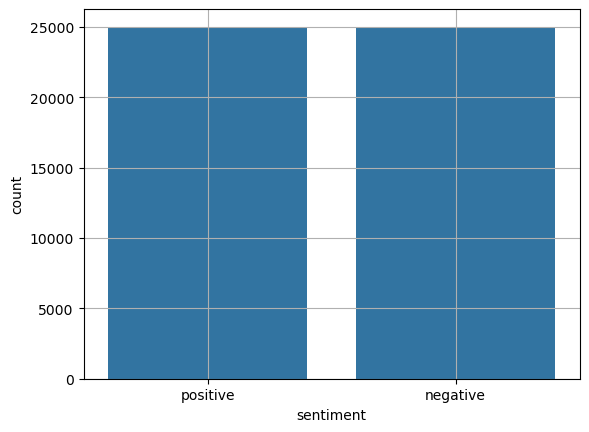

In [24]:
sns.countplot(x=df['sentiment'])
plt.grid()

In [25]:
df = df.dropna()
df[df['review'].str.isspace()]

,review,sentiment


We one hot encode the sentiment


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(stop_words='english')


In [28]:
matrix = cv.fit_transform(df[df['sentiment']=='negative']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('movie', 50089), ('film', 37579), ('like', 22451), ('just', 21065), ('good', 14717), ('bad', 14714), ('really', 12354), ('time', 12353), ('don', 10618), ('story', 10177), ('people', 9466), ('make', 9347), ('movies', 8311), ('plot', 8205), ('acting', 8083), ('way', 7780), ('characters', 7346), ('watch', 7215), ('think', 7127), ('did', 7020)]


In [29]:
matrix = cv.fit_transform(df[df['sentiment']=='positive']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])



Top 20 words used for Positive reviews.
[('film', 42093), ('movie', 37845), ('like', 17709), ('good', 15020), ('just', 14104), ('great', 12961), ('story', 12931), ('time', 12746), ('really', 10735), ('people', 8716), ('love', 8688), ('best', 8509), ('life', 8134), ('way', 7864), ('films', 7598), ('think', 7207), ('characters', 7098), ('don', 6998), ('movies', 6990), ('character', 6922)]


In [30]:
from sklearn.model_selection import train_test_split
X= df['review']
y=df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [32]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [33]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [126]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,accuracy_score

In [35]:
preds = pipe.predict(X_test)

In [36]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

    negative       0.91      0.90      0.90      4959
    positive       0.90      0.91      0.91      5041

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



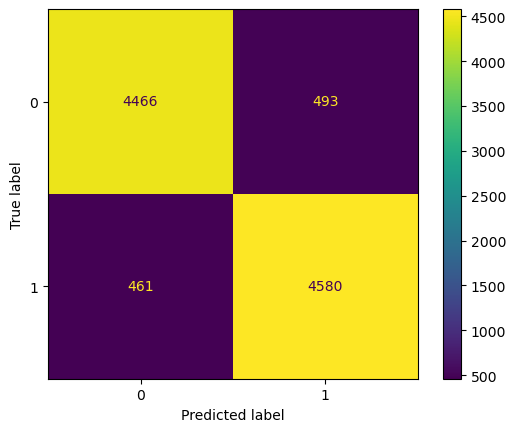

In [37]:
cm = confusion_matrix(y_test,preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [102]:
def clean_sentences(line):
    
    line=re.sub('<.*?>','',line) # removing html tags
    
    #removing contractions
    line=re.sub("isn't",'is not',line)
    line=re.sub("he's",'he is',line)
    line=re.sub("wasn't",'was not',line)
    line=re.sub("there's",'there is',line)
    line=re.sub("couldn't",'could not',line)
    line=re.sub("won't",'will not',line)
    line=re.sub("they're",'they are',line)
    line=re.sub("she's",'she is',line)
    line=re.sub("There's",'there is',line)
    line=re.sub("wouldn't",'would not',line)
    line=re.sub("haven't",'have not',line)
    line=re.sub("That's",'That is',line)
    line=re.sub("you've",'you have',line)
    line=re.sub("He's",'He is',line)
    line=re.sub("what's",'what is',line)
    line=re.sub("weren't",'were not',line)
    line=re.sub("we're",'we are',line)
    line=re.sub("hasn't",'has not',line)
    line=re.sub("you'd",'you would',line)
    line=re.sub("shouldn't",'should not',line)
    line=re.sub("let's",'let us',line)
    line=re.sub("they've",'they have',line)
    line=re.sub("You'll",'You will',line)
    line=re.sub("i'm",'i am',line)
    line=re.sub("we've",'we have',line)
    line=re.sub("it's",'it is',line)
    line=re.sub("don't",'do not',line)
    line=re.sub("that´s",'that is',line)
    line=re.sub("I´m",'I am',line)
    line=re.sub("it’s",'it is',line)
    line=re.sub("she´s",'she is',line)
    line=re.sub("he’s'",'he is',line)
    line=re.sub('I’m','I am',line)
    line=re.sub('I’d','I did',line)
    line=re.sub("he’s'",'he is',line)
    line=re.sub('there’s','there is',line)
    
    #special characters and emojis
    line=re.sub('\x91The','The',line)
    line=re.sub('\x97','',line)
    line=re.sub('\x84The','The',line)
    line=re.sub('\uf0b7','',line)
    line=re.sub('¡¨','',line)
    line=re.sub('\x95','',line)
    line=re.sub('\x8ei\x9eek','',line)
    line=re.sub('\xad','',line)
    line=re.sub('\x84bubble','bubble',line)
    
    # remove concated words
    line=re.sub('trivialBoring','trivial Boring',line)
    line=re.sub('Justforkix','Just for kix',line)
    line=re.sub('Nightbeast','Night beast',line)
    line=re.sub('DEATHTRAP','Death Trap',line)
    line=re.sub('CitizenX','Citizen X',line)
    line=re.sub('10Rated','10 Rated',line)
    line=re.sub('_The','_ The',line)
    line=re.sub('1Sound','1 Sound',line)
    line=re.sub('blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah','blah blah',line)
    line=re.sub('ResidentHazard','Resident Hazard',line)
    line=re.sub('iameracing','i am racing',line)
    line=re.sub('BLACKSNAKE','Black Snake',line)
    line=re.sub('DEATHSTALKER','Death Stalker',line)
    line=re.sub('_is_','is',line)
    line=re.sub('10Fans','10 Fans',line)
    line=re.sub('Yellowcoat','Yellow coat',line)
    line=re.sub('Spiderbabe','Spider babe',line)
    line=re.sub('Frightworld','Fright world',line)
    
    #removing punctuations
    
    punctuations = '@#!~?+&*[]-%._-:/£();$=><|{}^' + '''"“´”'`'''
    for p in punctuations:
        line = line.replace(p, f' {p} ')
        
    line=re.sub(',',' , ',line)
        
    # ... and ..
    line = line.replace('...', ' ... ')
    
    if '...' not in line:
        line = line.replace('..', ' ... ')
        
    return line

In [108]:
from sklearn.model_selection import train_test_split
X= df['review']
y=df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [114]:
X_train=X_train.apply(lambda s: clean_sentences(s))
X_test=X_test.apply(lambda s: clean_sentences(s))

In [116]:
pipe.fit(X_train,y_train)
preds =pipe.predict(X_test)

In [118]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

    negative       0.91      0.90      0.90      4959
    positive       0.90      0.91      0.91      5041

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [120]:
random_reviews = pd.Series([
    # POSITIVE REVIEWS (indices 0-9)
    "This is absolutely the best movie I have ever watched in my entire life! Amazing acting, incredible storyline, perfect cinematography. A masterpiece!",
    "Outstanding product! Exceeded all my expectations. Superior quality, fantastic design, and incredible value. Highly recommend to everyone!",
    "Phenomenal restaurant experience! The food was divine, service was impeccable, and atmosphere was perfect. Will definitely return!",
    "Brilliant book! Couldn't put it down. Captivating story, wonderful characters, and beautifully written. A literary gem!",
    "Fantastic hotel! Luxurious rooms, excellent staff, amazing location, and outstanding amenities. Perfect vacation experience!",
    "Incredible concert! The artist was phenomenal, sound quality was perfect, and the energy was electrifying. Best night ever!",
    "Amazing app! User-friendly interface, lightning fast performance, and incredibly useful features. Love it absolutely!",
    "Perfect shopping experience! Great prices, excellent quality products, and super fast delivery. Couldn't be happier!",
    "Wonderful spa treatment! Relaxing atmosphere, professional staff, and rejuvenating experience. Felt like heaven!",
    "Exceptional customer service! They went above and beyond to help me. Friendly, efficient, and truly caring staff!",
    
    # NEGATIVE REVIEWS (indices 10-19)
    "This is the worst movie ever made! Terrible acting, horrible plot, awful cinematography. Complete waste of time and money!",
    "Absolutely terrible product! Poor quality, ridiculous price, and completely useless. Regret buying this garbage!",
    "Disgusting restaurant experience! Food was revolting, service was rude, and place was filthy. Never going back!",
    "Horrible book! Boring story, terrible characters, and poorly written. Couldn't finish reading this trash!",
    "Awful hotel experience! Dirty rooms, rude staff, terrible location, and broken facilities. Worst vacation ever!",
    "Terrible concert! Artist was awful, sound quality was horrible, and venue was uncomfortable. Wasted my money!",
    "Useless app! Confusing interface, crashes constantly, and pointless features. Deleting immediately!",
    "Nightmare shopping experience! Overpriced junk, terrible quality, and delayed delivery. Avoid at all costs!",
    "Horrible spa treatment! Uncomfortable environment, unprofessional staff, and painful experience. Total disaster!",
    "Worst customer service ever! Rude, unhelpful, and completely incompetent staff. Absolutely frustrated and angry!"
])

In [158]:
true_labels = pd.Series([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
label_mapping = {0: 'negative', 1: 'positive'}
converted_labels = true_labels.map(label_mapping)
predictions = pipe.predict(random_reviews)
accuracy = accuracy_score(true_labels, predictions)
print(f"Accuracy on polar reviews: {accuracy}")
print(classification_report(true_labels, predictions))

# See specific misclassifications
for i, (true_label, pred) in enumerate(zip(true_labels, predictions)):
    if true_label != pred:
        print(f"MISCLASSIFIED {i}: {reviews_series[i][:60]}...")
        print(f"True: {true_label}, Predicted: {pred}\n")

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=[0 1] and y_pred=['negative' 'positive']. Make sure that the predictions provided by the classifier coincides with the true labels.